# Unfolding procedure

In [1]:
import ompy as om
import numpy as np
import matplotlib.pyplot as plt
import logging
import scipy as sp
from sklearn import preprocessing
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib import rc #remove the following three lines if you don't have LaTeX.
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)

#om.__full_version__;
np.random.seed(230396)

### Add a plotting function:

#### For pretty plots for the master thesis

In [2]:
def plotting(matrix=None, title=None, xlabel=None, ylabel=None, xlim=None, ylim=None, projection='No', 
             fontsize=40, labelsize=40, major_tick_length=15, minor_tick_length=8, tick_width=1.5, grid=False, 
             scale=None, vmin=None, vmax=None, savefig=None, Type='Matrix', arg1=None, arg2=None):
    '''
    Plotting function. (should make this into a class when time)
    
    Keywords:
    matrix: full filename of the matrix you want to plot
    title: Defaults None. Insert figure title as a string e.g. 'Cool Plot'.
    xlabel: defaults None, but can be changed to any string relevant for 
            x-axis e.g. xlabel=r'$\gamma$-ray energy $E_{\gamma}$ [keV]'.       
    ylabel: the same as xlabel, but for y-axis.
    xlim, ylim: limits for x, y axes. Takes a e.g. [0,2000] element.
    projection: defaults 'No', meaning no projection. projection = 'x' plots the x-projection of the matrix,
                and projection = 'y' plots the y-projection of the matrix.
    fontsize: size of the fonts, defaults 25.
    labelsize: size of the labels, defaults 25.  
    major_tick_length: size of major ticks, defaults 12
    minor_tick_length: size of minor ticks, defaults 6
    tick_width: width of ticks, defaults 1.5
    grid: Defaults False, but if True, adds a grid to the non-projection plot.
    scale: Defaults None(i.e. linear), but takes a string. so if you want logplot, type scale='log'.
    vmin: Defaults None, but can be used if you want to manually change the range of the colorbar.
    vmax: Same as vmin, but obviously the maximum value. E.g. vmin=1e-5, vmax=1e0.
    savefig: defaults None, but if != None it saves figure as the name you enter, e.g. savefig = 'U233_alfna_matrix.pdf'.
    Type: Defaults 'Matrix', but if 'Vector', it takes an ompy.Vector object instead of a matrix. If 'Non-Ompy', non ompy plot.
    arg1,arg2: The two arguments for x and y axis if Non-Ompy plot.
              
    Values used for two figure subplots in LaTeX: figsize=(10,8), fontsize=labelsize=40.
    Values used for one figure LaTeX plots: figsize=(14,8), fontsize=labelsize=30.
    Save files as .pdf if possible and they look nice, if not, save as .png with dpi=600.
    '''
    if Type == 'Matrix':
        if projection == 'No':
            fig, ax = plt.subplots(constrained_layout=True,figsize=(10,8))
            matrix.plot(scale=scale, vmin=vmin, vmax=vmax, ax=ax);
            fig.axes[0].xaxis.set_minor_locator(AutoMinorLocator())
            fig.axes[0].yaxis.set_minor_locator(AutoMinorLocator())
            fig.axes[0].tick_params(axis='both', which='both',labelsize=labelsize, width=tick_width)
            fig.axes[1].tick_params(axis='both', which='both',labelsize=labelsize, width=tick_width)
            fig.axes[0].tick_params(axis='both', which='major', length=major_tick_length)
            fig.axes[0].tick_params(axis='both', which='minor', length=minor_tick_length)
            fig.axes[1].tick_params(axis='both', which='major', length=major_tick_length)
            fig.axes[1].tick_params(axis='both', which='minor', length=minor_tick_length)
            plt.title(title, fontsize=fontsize)
            plt.xlim(xlim)
            plt.ylim(ylim)

            if grid == True:
                ax.grid(color='black', linestyle='--', linewidth=0.75)
            else:
                pass

            if isinstance(xlabel, str) and isinstance(ylabel, str):
                ax.set_xlabel(xlabel,fontsize=fontsize)
                ax.set_ylabel(ylabel, fontsize=fontsize)
            elif isinstance(xlabel, str):
                ax.set_xlabel(xlabel,fontsize=fontsize)
                ax.set_ylabel(r'Excitation energy $E_{x}$ [keV]',fontsize=fontsize)
            elif isinstance(ylabel, str):
                ax.set_xlabel(r'$\gamma$-ray energy $E_{\gamma}$ [keV]',fontsize=fontsize)
                ax.set_ylabel(ylabel,fontsize=fontsize)
            else:
                ax.set_xlabel(r'$\gamma$-ray energy $E_{\gamma}$ [keV]',fontsize=fontsize)
                ax.set_ylabel(r'Excitation energy $E_{x}$ [keV]',fontsize=fontsize)

        elif projection == 'x':
            fig, ax = plt.subplots(constrained_layout=True,figsize=(10,8))
            if scale is not None:
                matrix.plot_projection('Eg', kind='step', color='blue', scale=scale, ax=ax);
            else:
                matrix.plot_projection('Eg', kind='step', color='blue', ax=ax);
            fig.axes[0].xaxis.set_minor_locator(AutoMinorLocator())
            fig.axes[0].yaxis.set_minor_locator(AutoMinorLocator())
            fig.axes[0].tick_params(axis='both', which='both', labelsize=labelsize, width=tick_width)
            fig.axes[0].tick_params(axis='both', which='major', length=major_tick_length)
            fig.axes[0].tick_params(axis='both', which='minor', length=minor_tick_length)
            plt.title(title, fontsize=fontsize)
            plt.xlim(xlim)
            plt.ylim(ylim)
            
            if isinstance(xlabel, str) and isinstance(ylabel, str):
                ax.set_xlabel(xlabel, fontsize=fontsize)
                ax.set_ylabel(ylabel, fontsize=fontsize)
            elif isinstance(xlabel, str):
                ax.set_xlabel(xlabel, fontsize=fontsize)
                ax.set_ylabel(r'Counts',fontsize=fontsize)
            elif isinstance(ylabel, str):
                ax.set_xlabel(r'$\gamma$-ray energy $E_{\gamma}$ [keV]',fontsize=fontsize)
                ax.set_ylabel(ylabel, fontsize=fontsize)
            else:
                ax.set_xlabel(r'$\gamma$-ray energy $E_{\gamma}$ [keV]',fontsize=fontsize)
                ax.set_ylabel(r'Counts',fontsize=fontsize)

        elif projection == 'y':
            fig, ax = plt.subplots(constrained_layout=True,figsize=(10,8))
            if scale is not None:
                matrix.plot_projection('Ex', kind='step', color='blue', scale=scale, ax=ax);
            else:
                matrix.plot_projection('Ex', kind='step', color='blue', ax=ax);
            fig.axes[0].xaxis.set_minor_locator(AutoMinorLocator())
            fig.axes[0].yaxis.set_minor_locator(AutoMinorLocator())
            fig.axes[0].tick_params(axis='both', which='both', labelsize=labelsize, width=tick_width)
            fig.axes[0].tick_params(axis='both', which='major', length=major_tick_length)
            fig.axes[0].tick_params(axis='both', which='minor', length=minor_tick_length)
            plt.title(title, fontsize=fontsize)
            plt.xlim(xlim)
            plt.ylim(ylim)

            if isinstance(xlabel, str) and isinstance(ylabel, str):
                ax.set_xlabel(xlabel, fontsize=fontsize)
                ax.set_ylabel(ylabel, fontsize=fontsize)
            elif isinstance(xlabel,str):
                ax.set_xlabel(xlabel, fontsize=fontsize)
                ax.set_ylabel(r'Counts',fontsize=fontsize)
            elif isinstance(ylabel, str):
                ax.set_xlabel(r'Excitation energy $E_{x}$ [keV]',fontsize=fontsize)
                ax.set_ylabel(ylabel, fontsize=fontsize)
            else:
                ax.set_xlabel(r'Excitation energy $E_{x}$ [keV]',fontsize=fontsize)
                ax.set_ylabel(r'Counts',fontsize=fontsize)

        else:
            raise SyntaxError(repr("Projection error! Use projection = 'No' (default) or 'x' or 'y'."))
            
    elif Type == 'Vector':
        fig, ax = plt.subplots(constrained_layout=True,figsize=(10,8))
        if scale is not None:
            matrix.plot(kind='step', color='blue', scale=scale, ax=ax)
        else:
            matrix.plot(kind='step', color='blue', ax=ax)
        fig.axes[0].xaxis.set_minor_locator(AutoMinorLocator())
        fig.axes[0].yaxis.set_minor_locator(AutoMinorLocator())
        fig.axes[0].tick_params(axis='both', which='both',labelsize=labelsize, width=tick_width)
        fig.axes[0].tick_params(axis='both', which='major', length=major_tick_length)
        fig.axes[0].tick_params(axis='both', which='minor', length=minor_tick_length)
        plt.title(title, fontsize=fontsize)
        plt.xlim(xlim)
        plt.ylim(ylim)

        if grid == True:
            ax.grid(color='black', linestyle='--', linewidth=0.75)
        else:
            pass

        if isinstance(xlabel, str) and isinstance(ylabel, str):
            ax.set_xlabel(xlabel,fontsize=fontsize)
            ax.set_ylabel(ylabel, fontsize=fontsize)
        elif isinstance(xlabel, str):
            ax.set_xlabel(xlabel,fontsize=fontsize)
            ax.set_ylabel(r'Counts',fontsize=fontsize)
        elif isinstance(ylabel, str):
            ax.set_xlabel(r'Excitation energy $E_{x}$ [keV]',fontsize=fontsize)
            ax.set_ylabel(ylabel,fontsize=fontsize)
        else:
            ax.set_xlabel(r'Excitation energy $E_{x}$ [keV]',fontsize=fontsize)
            ax.set_ylabel(r'Counts',fontsize=fontsize)
            
    elif Type == 'Non-Ompy':
        fig, ax = plt.subplots(constrained_layout=True,figsize=(10,8))
        ax.plot(arg1, arg2, color='blue')
        fig.axes[0].xaxis.set_minor_locator(AutoMinorLocator())
        fig.axes[0].yaxis.set_minor_locator(AutoMinorLocator())
        fig.axes[0].tick_params(axis='both', which='both',labelsize=labelsize, width=tick_width)
        fig.axes[0].tick_params(axis='both', which='major', length=major_tick_length)
        fig.axes[0].tick_params(axis='both', which='minor', length=minor_tick_length)
        plt.title(title, fontsize=fontsize)
        if scale is not None:
            plt.yscale(scale)
        else:
            pass
        plt.xlim(xlim)
        plt.ylim(ylim)

        if grid == True:
            ax.grid(color='black', linestyle='--', linewidth=0.75)
        else:
            pass

        if isinstance(xlabel, str) and isinstance(ylabel, str):
            ax.set_xlabel(xlabel,fontsize=fontsize)
            ax.set_ylabel(ylabel, fontsize=fontsize)
        elif isinstance(xlabel, str):
            ax.set_xlabel(xlabel,fontsize=fontsize)
            ax.set_ylabel(r'ADD Y LABEL',fontsize=fontsize)
        elif isinstance(ylabel, str):
            ax.set_xlabel(r'Excitation energy $E_{x}$ [keV]',fontsize=fontsize)
            ax.set_ylabel(ylabel,fontsize=fontsize)
        else:
            ax.set_xlabel(r'Excitation energy $E_{x}$ [keV]',fontsize=fontsize)
            ax.set_ylabel(r'ADD Y LABEL',fontsize=fontsize)
        
    else:
        raise TypeError(repr("Choose Type to be 'Matrix', 'Vector' or 'Non-Ompy'."))
        
    if savefig != None:
        plt.savefig(savefig, dpi=600)

### Rebinning function to test the effect of rebinning:

In [3]:
def rebin_function(matrix, keV_per_bin_ex, upper_cut_ex, keV_per_bin_eg=None, upper_cut_eg=None, vector=False):
    '''
    Rebins both axes and cuts the upper limit.
    
    Keywords:
    matrix: input a ompy.Matrix element
    keV_per_bin_ex: desired keV per bin for Ex, input an integer e.g. 150 or 250.
    keV_per_bin_eg: desired keV per bin for Eg, input an integer e.g. 150 or 250.
    upper_cut_ex: upper cut of the matrix, for Ex.
    upper_cut_eg: upper cut of the matrix, for Eg.
    vector: defaults False, but if True it rebins a ompy.Vector object instead of matrix.
    '''
    if vector == False:
        rebinned_matrix = matrix.copy()

        cut_ex = keV_per_bin_ex * round(upper_cut_ex/keV_per_bin_ex)
        rebinned_matrix.cut('Ex', 0, cut_ex)
        cut_eg = keV_per_bin_eg * round(upper_cut_eg/keV_per_bin_eg)
        rebinned_matrix.cut('Eg', 0, cut_eg)

        mid_Ex = np.linspace(keV_per_bin_ex/2, cut_ex - keV_per_bin_ex/2,
                             int(cut_ex/keV_per_bin_ex))
        rebinned_matrix.rebin('Ex', mids = mid_Ex)

        mid_Eg = np.linspace(int(keV_per_bin_eg/2), cut_eg - keV_per_bin_eg/2, 
                             int(cut_eg/keV_per_bin_eg))
        rebinned_matrix.rebin('Eg', mids = mid_Eg)
        
        if (rebinned_matrix.Ex[1]-rebinned_matrix.Ex[0]) != keV_per_bin_ex and (rebinned_matrix.Eg[1]-rebinned_matrix.Eg[0]) != keV_per_bin_eg:
            raise ValueError('Error with binning values!')
        else:
            return rebinned_matrix
    
    elif vector == True:
        rebinned_vector = matrix.copy()
        
        cut_vector = keV_per_bin_ex * round(upper_cut_ex/keV_per_bin_ex)
        rebinned_vector.cut(0, cut_vector)

        mid_E = np.linspace(keV_per_bin_ex/2, cut_vector - keV_per_bin_ex/2,
                             int(cut_vector/keV_per_bin_ex))
        rebinned_vector.rebin(mids = mid_E)
        
        if (rebinned_vector.E[1]-rebinned_vector.E[0]) != keV_per_bin_ex:
            raise ValueError('Error with binning values!')
        else:
            return rebinned_vector
    
    else:
        raise SyntaxError(repr("Vector must be either 'True' or 'False'."))

### Read the mama-file:

#### Reading the unbinned matrix where I have filled and removed negatives using MaMA. Then I rebin the matrix:


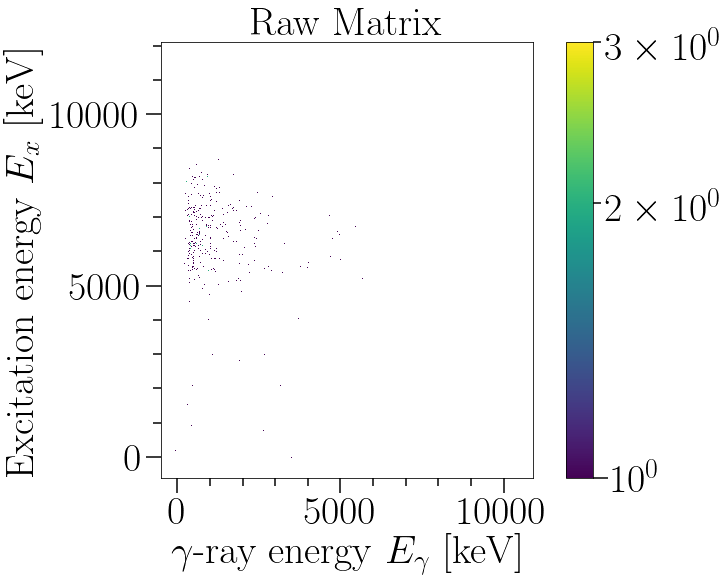

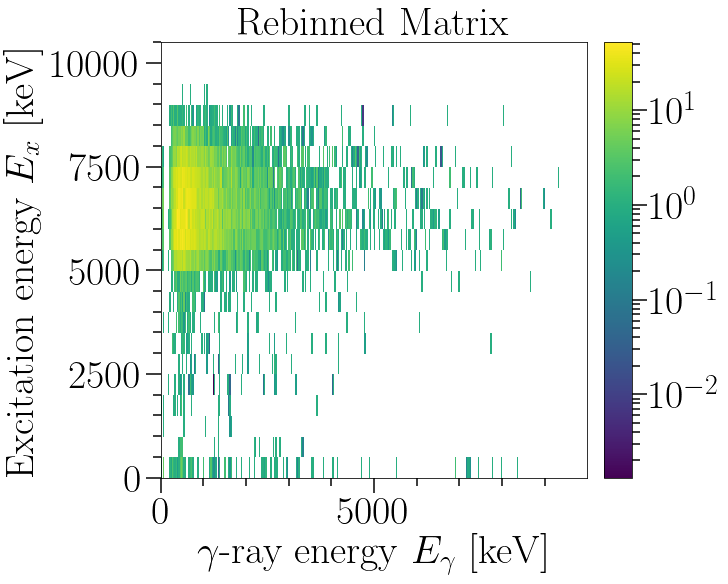

In [4]:
input_matrix = om.Matrix(path='alfna_newsubtract_nobin_fnrn.m')

alfna_matrix = input_matrix.copy() #copy to avoid problems in cutting etc.

#Plotting for visualization
plotting(alfna_matrix,title=r'Raw Matrix')

rebinned_alfna = rebin_function(alfna_matrix, keV_per_bin_ex=500, upper_cut_ex=10500,
                               keV_per_bin_eg = 30, upper_cut_eg=10000)
plotting(rebinned_alfna, title=r'Rebinned Matrix')

#### For CACTUS the response functions do not include detector threshold, so this is added manually along with response functions:

2020-11-16 19:04:05,889 - ompy.response - INFO - Note: Spectra outside of 360.0 and 15000.0 are extrapolation only.
2020-11-16 19:04:10,437 - ompy.response - INFO - Note: Spectra outside of 360.0 and 15000.0 are extrapolation only.


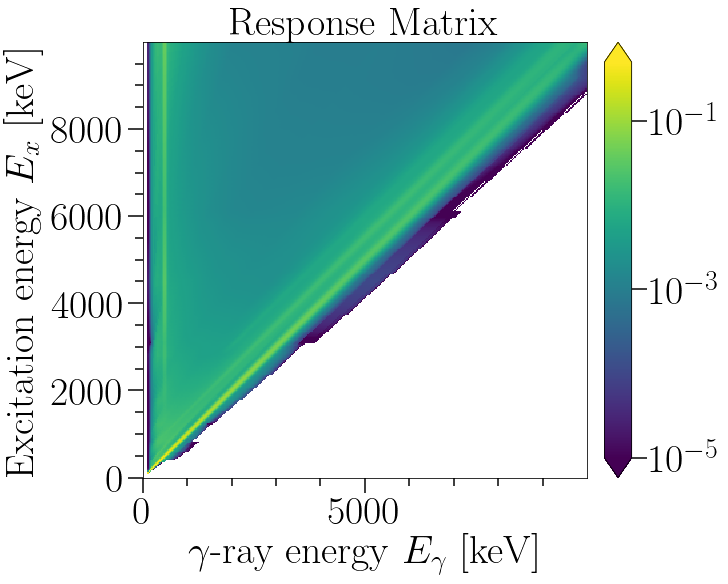

In [5]:
#Logging information
logger = om.introspection.get_logger('response', 'INFO')

#Loading response matrix:
response_path = '/Users/Julian/ompy/OCL_response_functions/nai2012_for_opt13'

#Energy calibration of the resulting response matrix:
Eg = rebinned_alfna.Eg

#Experimental relative FWHM at 1.33 MeV of resulting array for CACTUS
fwhm_abs = 90.44 #  90/1330 = 6.8%

#Applying detector treshold for response function for CACTUS:
cactus_threshold = sp.interpolate.interp1d([30., 80., 122., 183., 244., 294., 344., 562., 779., 1000.],
                                          [0.0, 0.0, 0.0, 0.06, 0.44, 0.60, 0.87, 0.99, 1.00, 1.00],
                                          fill_value = 'extrapolate') #Values taken from folding.f in mama-software

def apply_detector_threshold(response, table, cactus_threshold):
    threshold = cactus_threshold(response.Eg)
    response.values = response.values * threshold
    
    #renormalize
    response.values = om.div0(response.values, response.values.sum(axis=1)[:, np.newaxis])
    table['eff_tot'] *= threshold
    

#Applying the Ompy software:
#Magne recommends 1/10 of the actual resolution for unfolding process.
response = om.Response(response_path)
R_ompy_view, R_tab_view = response.interpolate(Eg, fwhm_abs=fwhm_abs, return_table=True)
R_ompy_unf, R_tab_unf = response.interpolate(Eg, fwhm_abs=fwhm_abs/10.0, return_table=True)

apply_detector_threshold(R_ompy_unf, R_tab_unf, cactus_threshold)
apply_detector_threshold(R_ompy_view, R_tab_view, cactus_threshold)

#Plotting the response matrix:
plotting(R_ompy_view, title=r'Response Matrix',scale='log',vmin=1e-5,vmax=5e-1)

### The unfolding

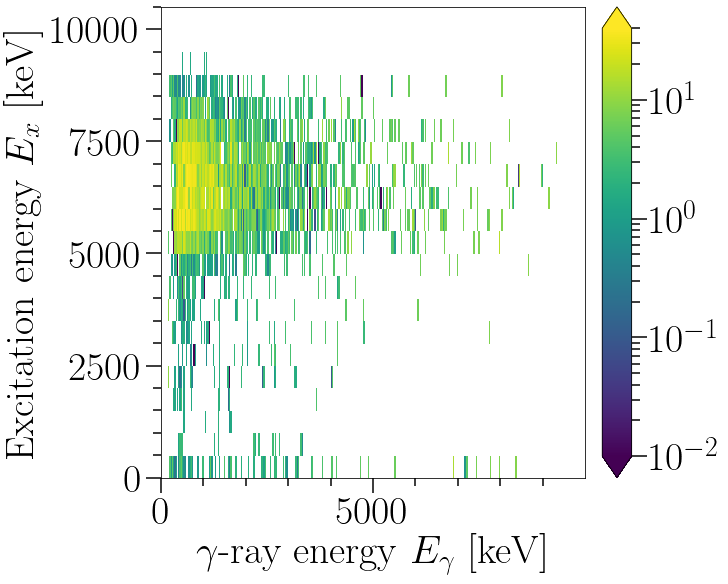

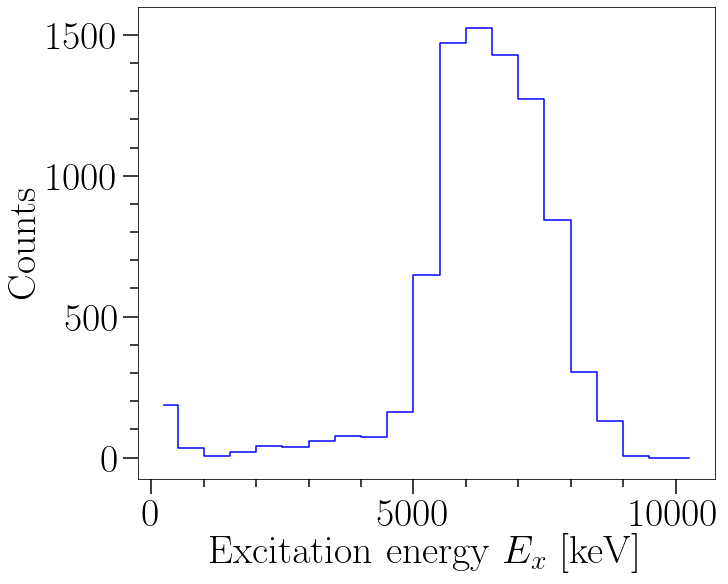

In [6]:
#Logging information
logger = om.introspection.get_logger('unfolder', 'INFO')


#Unfolding
unfolder = om.Unfolder(response=R_ompy_unf)
unfolder.use_compton_subtraction = True #default
unfolder.response_tab = R_tab_unf

#Magne suggest some tweaks for better unfolding performance. Check! Default is 1 for all
unfolder.FWHM_tweak_multiplier = {'fe': 1., 'se': 1.1, 'de': 1.3, '511': 0.9}

unfolded = unfolder(rebinned_alfna)
plotting(unfolded, vmin=1e-2, vmax=4e1)
plotting(unfolded, projection='y')

### The number of fissions is also needed (these are also rebinned to match the $E_x$ binning):

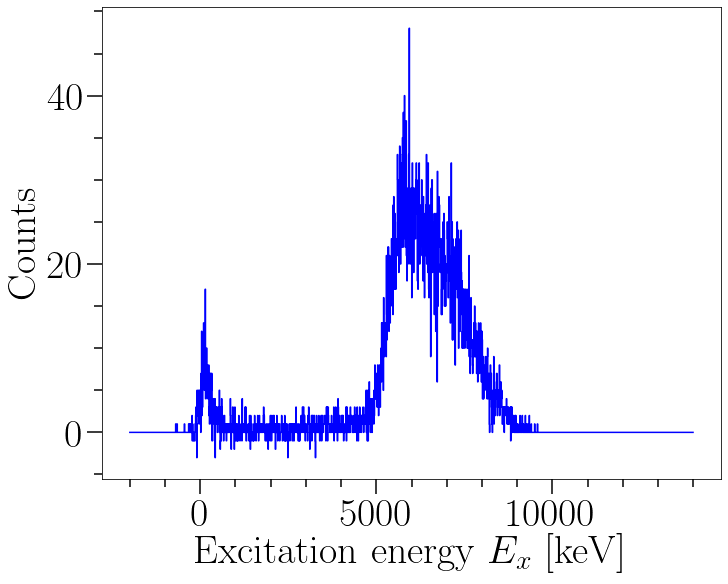

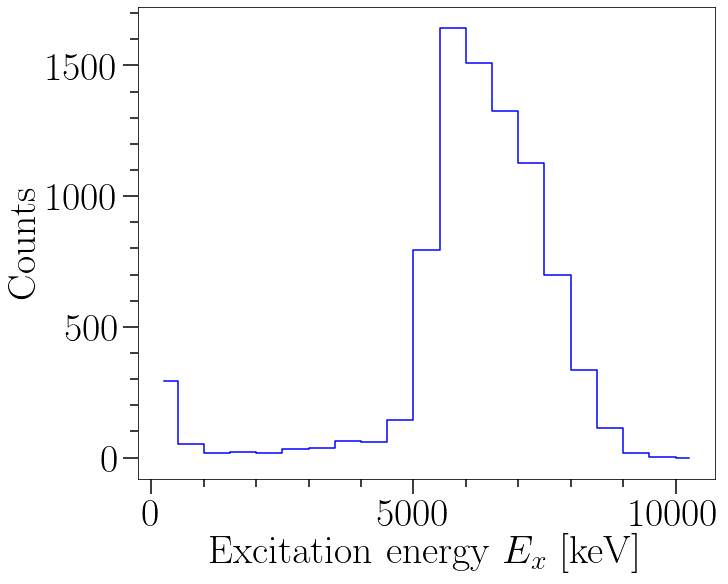

In [7]:
num_fiss = om.Vector(path='num_fiss_nobin.m')

plotting(num_fiss, Type = 'Vector')

num_fiss_rebinned = rebin_function(num_fiss, vector=True, keV_per_bin_ex=500, upper_cut_ex=10500)

plotting(num_fiss_rebinned, Type = 'Vector')

#Extracting fission values:
fission_values = num_fiss_rebinned.values

## Calculating the Prompt fission $\gamma$ ray characteristics:

#### Total $\gamma$ energy per fission is defined as:
$
\large
\begin{equation}
     E_{tot, i} = \frac{\sum_j M_{ij} E_j}{F_i \varepsilon_{\gamma}}
\end{equation}
$

#### The $\gamma$ multiplicity per fission:

$
\large
\begin{equation}
    M_{g, i} = \frac{\sum_j M_{ij}}{F_i \varepsilon_{\gamma}} ,
\end{equation}
$

#### The average energy per $\gamma$ ray as a function of excitation energy:

$
\large
\begin{equation}
    E_{g, i} = \frac{E_{tot, i}}{M_{g, i}}
\end{equation}
$

### Setting our $\varepsilon_{\gamma}$:

In [8]:
epsilon = 0.142 #14.2% efficiency

### First finding $E_{tot}$:

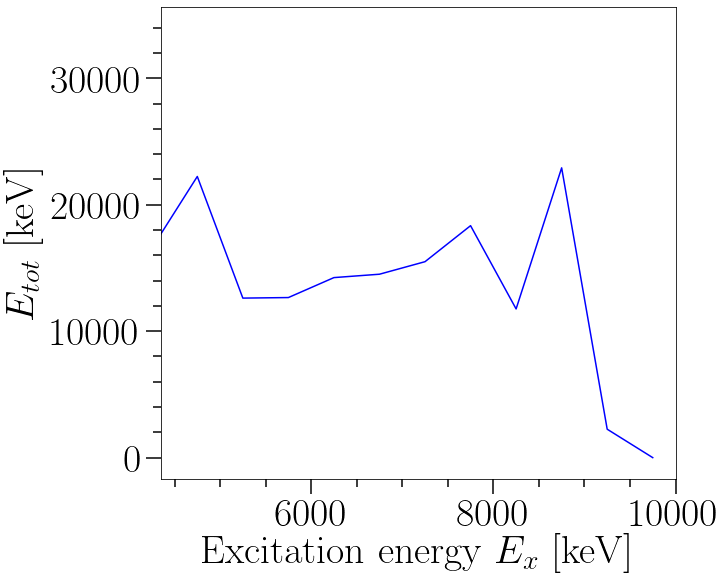

In [9]:
E_tot = np.zeros(len(unfolded.Ex))
for i in range(len(E_tot)):
    for j in range(len(unfolded.Eg)):
        E_tot[i] += unfolded.Eg[j] * unfolded.values[i][j] /(float(fission_values[i])*epsilon)
        
plotting(arg1 = unfolded.Ex, arg2 = E_tot, Type='Non-Ompy', ylabel=r'$E_{tot}$ [keV]', xlim=[4350,10000])

### The $\gamma$ multiplicity $M_g$:

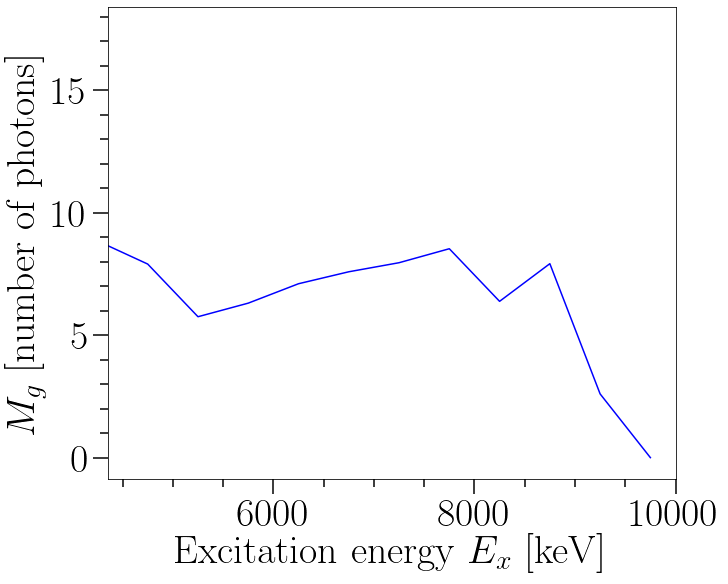

In [10]:
M_g = np.zeros(len(unfolded.Ex))
for i in range(len(E_tot)):
    for j in range(len(unfolded.Eg)):
        M_g[i] +=  unfolded.values[i][j]/(float(fission_values[i])*epsilon)

plotting(arg1 = unfolded.Ex, arg2 = M_g, Type='Non-Ompy',ylabel=r'$M_{g}$ [number of photons]',xlim=[4350,10000])

### The average energy per $\gamma$, $E_g$:

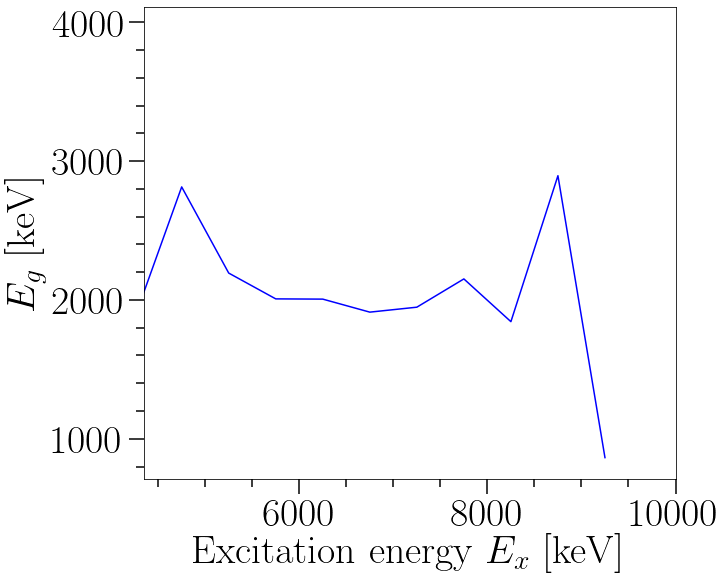

In [11]:
E_g_i = np.zeros_like(M_g)

for i in range(len(M_g)):
    E_g_i[i] = E_tot[i]/float(M_g[i])

plotting(arg1 = unfolded.Ex, arg2 = E_g_i, Type = 'Non-Ompy', ylabel=r'$E_{g}$ [keV]',xlim=[4350,10000])

### The $\gamma$ ray spectrum:

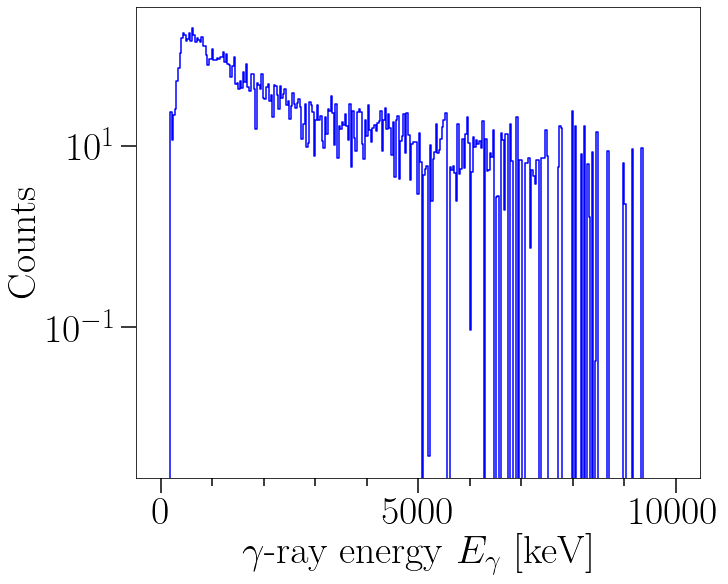

In [12]:
plotting(unfolded, projection='x',scale='log')

### Read in Häusser data:

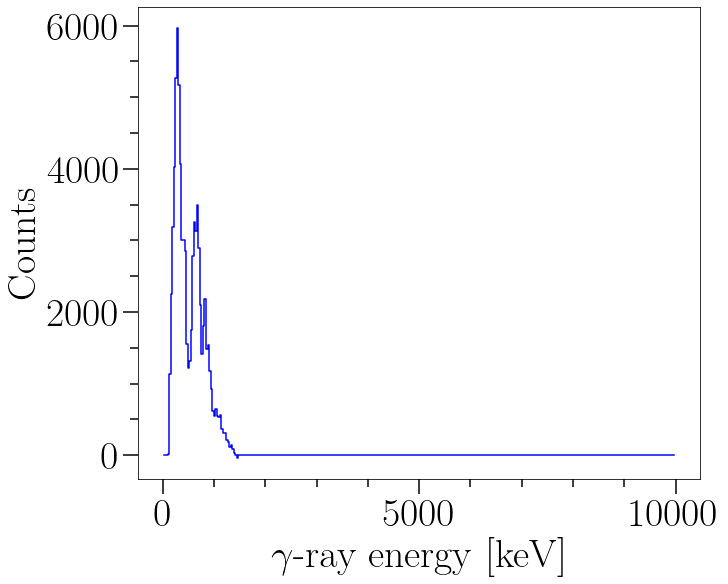

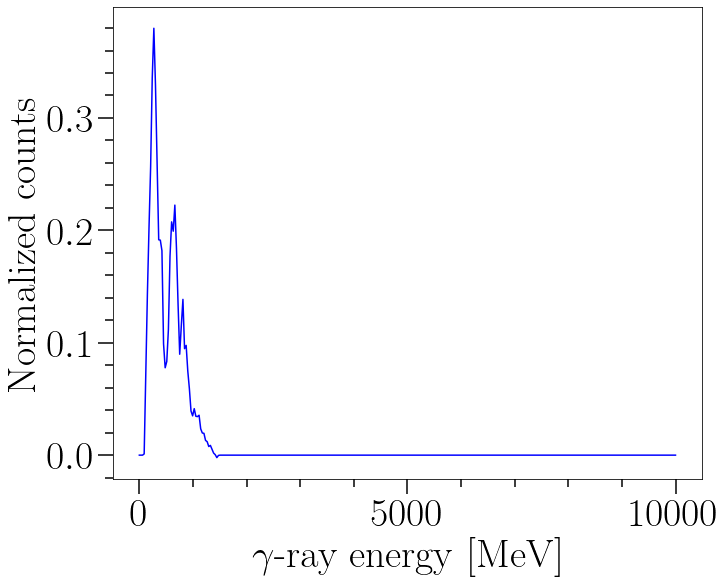

In [13]:
filename = '/Users/Julian/Desktop/Master/Unfolding/hausser_data.dat'

infile = open(filename, 'r')
split = infile.read().split()
data = [float(string.replace(',','.')) for string in split]

#Making sure there are no negative values 
for i in range(len(data[1::2])):
    if data[1::2][i] < 0:
        data[1::2][i] = 0

data_x = data[::2]
data_y = data[1::2]

x_data = np.zeros(376)
y_data = np.zeros(376)

for i in range(len(x_data)):
    if i < 375:
        x_data[i] = data_x[i]
        y_data[i] = data_y[i]
    else:
        x_data[i] = 10
        y_data[i] = 0
        

hausser_vec = om.Vector(y_data,x_data*1e3)
hausser_rebinned = rebin_function(hausser_vec, keV_per_bin_ex=30, upper_cut_ex=10000, vector=True)


hausser_dat = preprocessing.normalize([hausser_rebinned.values])
x_values = np.linspace(0,10000,333)

plotting(hausser_rebinned, Type='Vector', xlabel=r'$\gamma$-ray energy [keV]', ylabel=r'Counts')
plotting(arg1=x_values, arg2=hausser_dat[0], Type='Non-Ompy', ylabel='Normalized counts', xlabel=r'$\gamma$-ray energy [MeV]')

#Additional figures of hausser spectrum:
#plotting(hausser_vec, Type='Vector', xlabel=r'$\gamma$-ray energy [keV]', ylabel=r'Counts')
#plotting(arg1=data_x, arg2=data_y[0], Type='Non-Ompy', ylabel='Normalized counts', xlabel=r'$\gamma$-ray energy [MeV]')

mean f value:
0.07216874367107774
------------
sum of gamma counts:
5168.650706596038


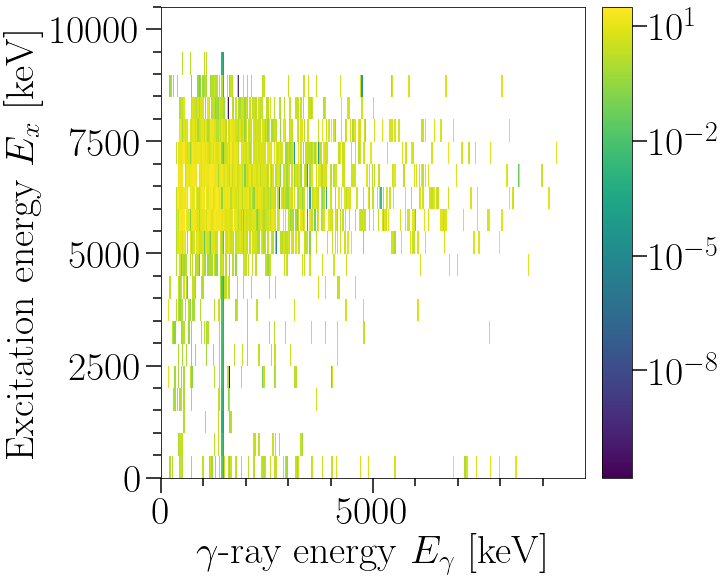

In [14]:
a = 0.1 #U234
b = 2.5 #U234
#Sn = 5.762 #for U233
Sn = 6.85
M = 6.31 #U234
f = np.zeros(len(unfolded.Ex))
epsilon_n = 0.21

unfolded_kopi = unfolded.copy()

for i in range(len(unfolded_kopi.Ex)):
    for j in range(len(unfolded_kopi.Eg)):
        unfolded_kopi[i][j] = 0

for i in range(len(unfolded.Ex)):
    nu = a*(unfolded.Ex[i]*1e-3 - Sn) + b
    f[i] = (epsilon_n*nu)/(epsilon_n*nu + M)

n_tot_ex = np.zeros(len(unfolded.Ex))
for i in range(len(n_tot_ex)):
    for j in range(len(unfolded.Eg)):
        n_tot_ex[i] += unfolded.values[i][j]


n_neutrons = unfolded_kopi.copy()
for i in range(len(unfolded.Ex)):
    for j in range(len(unfolded.Eg)):
        n_neutrons[i][j] = f[i]*n_tot_ex[i]*hausser_dat[0][j]

n_gamma = unfolded_kopi.copy()
for i in range(len(unfolded.Ex)):
    for j in range(len(unfolded.Eg)):
        n_gamma[i][j] = unfolded.values[i][j] - n_neutrons[i][j]


print('mean f value:')
print(np.mean(f))
print('------------')
print('sum of gamma counts:')
print(np.sum(n_gamma.values))

plotting(n_gamma)

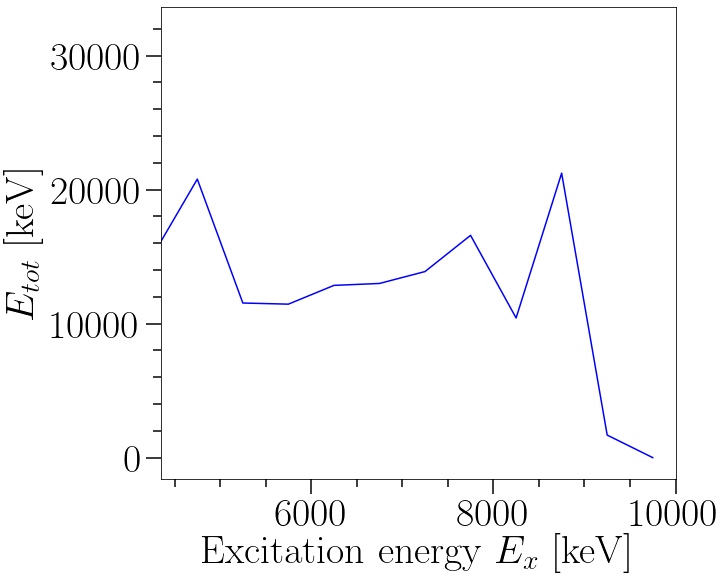

In [15]:
E_tot_new = np.zeros(len(n_gamma.Ex))
for i in range(len(E_tot_new)):
    for j in range(len(n_gamma.Eg)):
        E_tot_new[i] += n_gamma.Eg[j] * n_gamma.values[i][j] /(float(fission_values[i])*epsilon)
        
plotting(arg1 = n_gamma.Ex, arg2 = E_tot_new, Type='Non-Ompy', ylabel=r'$E_{tot}$ [keV]', xlim=[4350,10000])

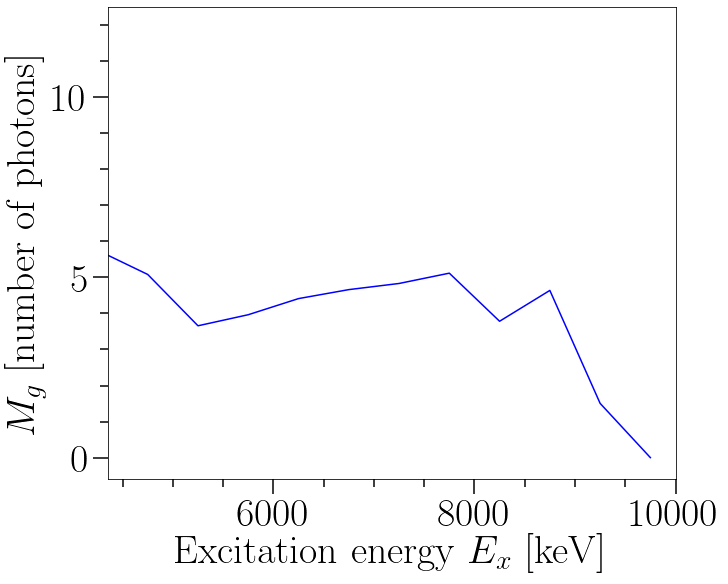

In [16]:
M_g_new = np.zeros(len(n_gamma.Ex))
for i in range(len(M_g_new)):
    for j in range(len(n_gamma.Eg)):
        M_g_new[i] +=  n_gamma.values[i][j]/(float(fission_values[i])*epsilon)

plotting(arg1 = n_gamma.Ex, arg2 = M_g_new, Type='Non-Ompy',ylabel=r'$M_{g}$ [number of photons]',xlim=[4350,10000])

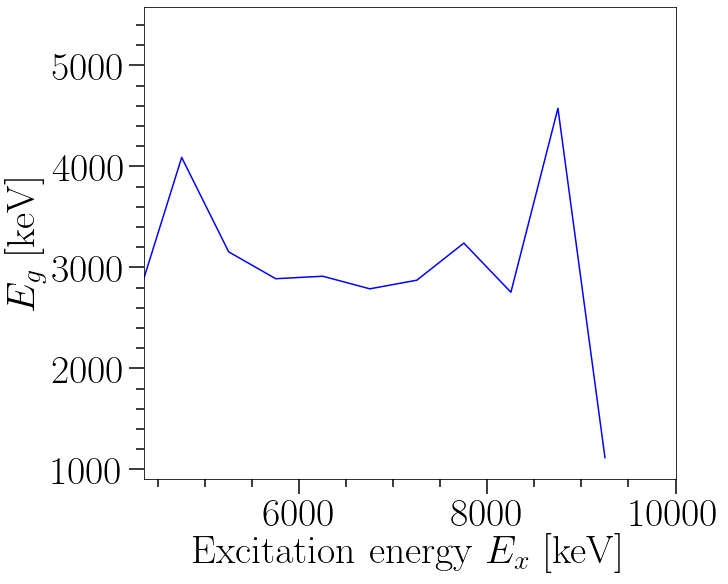

In [17]:
E_g_i_new = np.zeros(len(n_gamma.Ex))

for i in range(len(E_g_i_new)):
    E_g_i_new[i] = E_tot_new[i]/float(M_g_new[i])

plotting(arg1 = n_gamma.Ex, arg2 = E_g_i_new, Type = 'Non-Ompy', ylabel=r'$E_{g}$ [keV]',xlim=[4350,10000])